In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd '/content/drive/MyDrive/Github/Male_Gaze_NLP/src/'
from Gender_Identification_Evaluation import test_gender_acc, confusion_plot

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Github/Male_Gaze_NLP/src


# Import auto results

In [ ]:
import pickle

f_pro = pickle.load(open('/content/drive/MyDrive/NLU1012_Project/female.p', 'rb' ))
m_pro = pickle.load(open('/content/drive/MyDrive/NLU1012_Project/male.p', 'rb' ))
n_pro = pickle.load(open('/content/drive/MyDrive/NLU1012_Project/non_gender.p', 'rb' ))
s_pro = pickle.load(open('/content/drive/MyDrive/NLU1012_Project/surnames.p', 'rb' ))

pro = {'Female': f_pro, 'Male': m_pro, 'Non_human': n_pro, 'Surname': s_pro}

# Import manual results

In [ ]:
manual_res = {
"Emma" : {
"Mixed_Surnames": ['Weston', 'Elton', 'Knightley', 'Woodhouse', 'Perry', 'Churchill', 'Martin', 'Cole', 'Dixon', 'Campbell', 'Coles', 'Suckling', 'Smallridge', 'Bragge', 'Knightleys', 'Otway', 'Woodhouses', 'Cox', 'Hughes']
,"Male": ['Frank Churchill', 'Frank', 'John Knightley', 'Martin', 'Frank', 'John Knightley', 'John', 'Robert Martin', 'James', 'Frank Churchill’s', 'William Larkins', 'Henry', 'Wingfield', 'William', 'George']
,"Female": ['Emma', 'Harriet', 'Jane',  'Miss Bates', 'Jane Fairfax', 'Fairfax', 'Isabella', 'Goddard', 'Taylor', 'Bates',  'Miss Smith', 'Harriet Smith', 'Miss Woodhouse', 'Patty', 'Smith', 'Nash', 'Hawkins', 'Jane Fairfax’s', 'Miss', 'Miss Hawkins', 'Emma Woodhouse', 'Elizabeth', 'Ford', 'Hodges', 'Gilbert',  'Harriet Smith’s', 'Selina', 'Miss Taylor', 'Miss Churchill', 'Bella', 'Miss Campbell', 'Wallis', 'Stokes', 'Miss Bickerton']
,"Non_human": ['Project Gutenberg-tm', 'Project Gutenberg', 'Bath', 'E.', 'Surry', 'Donwell', 'Enscombe', 'Yorkshire', 'Donwell Abbey', 'Abbey-Mill', 'Wright', 'Project Gutenberg-tm License', 'Jane Austen', 'CHAPTER V. CHAPTER VI', 'Kitty', '&c.']
},

"Great_Expectations" : {
"Mixed_Surnames": ['Pocket', 'Hubble', 'Gargery', 'Barley', ]
,"Male":['Joe', 'Herbert', 'Wemmick', 'Jaggers', 'Pip', 'Pumblechook', 'Wopsle', 'Provis', 'Orlick', 'Drummle', 'Handel', 'Joseph', 'Jack', 'Trabb', 'Uncle Pumblechook', 'Matthew', 'Magwitch', 'Mike', 'Avenger', 'Richard', 'Tom', 'John', 'Waldengarver', 'Compeyson', 'Matthew Pocket', 'Spider', 'Bill Barley', 'William', 'Joe Gargery', 'Startop', 'Brandley', 'Arthur', 'Raymond', 'J. Gargery', 'Mithter Jaggerth',  'Barnard', 'Campbell', 'Philip', 'Collins', 'George Barnwell', 'Joseph Gargery', 'Clarriker', 'Abel Magwitch' ]
,"Female":['Havisham', 'Estella', 'Biddy', 'Miss Havisham', 'Skiffins', 'Sarah Pocket', 'Flopson', 'Clara', 'Jane', 'Sarah', 'Camilla', 'Herbert Pocket', 'Coiler', 'Whimple', 'Belinda']
,"Non_human":['Project Gutenberg-tm', 'Mum', 'Project Gutenberg', 'I.', 'Hammersmith', 'I. “', 'Lookee', 'Satis House', 'wolf', 'Devil', 'Project Gutenberg-tm License', 'God', 'Jacks', 'Guilty', 'Boar', 'Bartholomew Close', 'Cheapside', 'Newgate', 'Death']
},

'Mrs_Dalloway_in_Bond_Street': {
"Mixed_Surnames": []
,"Male":['Dick', 'Hugh Whitbread', 'Dighton']
,"Female":['Clarissa', 'Mrs Dalloway']
,"Non_human":['Project Gutenberg-tm', 'Project Gutenberg', 'Project Gutenberg-tm License']
},

"Little_Women": {
"Mixed_Surnames":['Moffat', 'Scott', 'March', 'Carrol', 'Hummel', 'Lamb',  ]
,"Male":['Laurie', 'John', 'Brooke', 'Laurence', 'Bhaer', 'Teddy', 'Fred', 'Demi', 'Davis', 'Dashwood', 'Ned', 'Frank', 'Roderigo', 'John Brooke', 'Fritz', 'Don Pedro', 'Bangs', 'Tudor', 'Grandpa', 'Belsham', 'Ned Moffat', 'Snodgrass', 'Friedrich', "Don Pedro's", 'Cutter', 'Theodore Laurence', 'George', 'Fred Vaughn', 'David', 'Jack', 'Friedrich Bhaer', 'Charles Dickens']
,"Female":['Jo', 'Amy', 'Beth', 'Meg', 'Hannah', 'Daisy', 'Kate', 'Margaret', 'Flo', 'Sallie', 'Marmee', 'Aunt', 'Esther', 'Zara', 'Kirke', 'Hagar', 'Annie', 'Chester', 'Tina', 'Gardiner', 'Bethy', 'JO', 'Jo decidedly',' Joanna', 'Lotty', 'Crocker', 'Jenny', 'Miss Belle', 'Miss Crocker', 'Grace', 'Kitty', 'Jo.', 'Annie Moffat', 'Belle', 'Mary', 'Ellen Tree', 'Norton', 'BETH', 'Josephine', 'Raphael', 'Susie', 'Snow', "Annie Moffat's", 'Clara', 'Tupman', 'Sallie Gardiner', 'Jo felt', 'Sallie Moffat', 'Randal', 'Grundy', 'Presently Jo', 'Miss Lamb']
,"Non_human":['Project Gutenberg', 'Alcott', 'Shakespeare', 'God', 'K.', 'Hush', 'Pickwick', 'Thou', 'King', 'Down', 'Gott', 'pell-mell', 'gravely,--']
},

"Jane_Eyre": {
"Mixed_Surnames": ["Fairfax","Reed","Rivers","Temple","Oliver", "Eshton", "Leaven", "Gibson"]
,"Male": ["Rochester", "John", "Brocklehurst", "St. John", "Mason","Edward", "Briggs", "Lloyd", "Carter","John Reed", "Sam", "Richard", "Robert", "George" "Lynn", "Wood", "Theodore", "Bates", "Henry" "Lynn", "Lynn", "Bobby", "Frederick Lynn"]
,"Female": ["Jane", "Bessie","Mary", "Diana", "Eyre", "Hannah", "Jane Eyre", "Miss Temple", "Miss", "Scatcherd", "Helen", "Janet", "Helen Burns", "Miss Miller", "Miss Ingram", "Abbot", "Ingram", "Dent", "Poole", "Miss Abbot", "Missis", "Miss Smith", "Miss Oliver","Miller", "Burns", "Louisa", "Varens", "Grace", "Adèle", "Mary Ingram", "Amy", "Amy Eshton", "Lady Ingram", "Georgiana", "Barbara", "Lady Lynn", "Louisa Eshton", "Mary Rivers", "Rosamond Oliver", "Céline Varens", "Jane Rochester", "Giacinta", "Rosamond"]
,"Non_human": ["Project Gutenberg-tm", "Lowood", "Morton","Project Gutenberg", "&c.","Whitcross",  "Gateshead", "Hush", "Reader", "God", "Hitherto", "bush", "Carlo", "Project Gutenberg-tm" "License", "satin", "Providence", "Jesus", "Die", "Lamb"]
},

"Lolita": {
"Mixed_Surnames": ["Humbert", "Humberts", "Quilty", "Chatfields", "Holmes", "Haze"]
,"Male": ["Dick", "John", "Humbert Humbert", "McCoo", "Bill", "Gaston", "Charlie", "Leslie", "Tony", "Roy", "Leslie Tomso", "Frank", "bobby", "Harold Haze", "Dad", "Boyd", "Braddock", "Cue"]
,"Female": ["Lo", "Lolita", "Jean", "Rita", "Mona", "Dolores Haze", "Louise", "Mary", "Annabel", "Monique", "Phyllis", "Charlotte", "Barbara", "Diana", "Avis", "Phalen", "mummy", "Holigan", "Valechka", "Clare", "Eva" "Rosen", "Lester", "Dolly" "Schiller", "Lee", "Miss Phalen", "Miss Opposite", "Charlotte Haze", "Jean Farlow", "Mother", "Linda Hall", "Linda", "Carmencita"]
,"Non_human": ["Parkington", "Pisky", "Wace", "Adam", "God", "bush", "Shakespeare", "Gazette"]
},

"Villette": {
"Mixed_Surnames": ["Bretton", "Home", "Marchmont", "Athénée"]
,"Male": ["Graham", "John", "M. Paul", "M. Emanuel", "M. de Bassompierre", "Monsieur", "Frank", "Graham Bretton", "Paul", "M. Paul Emanuel", "Emanuel", "Barrett", "John Graham", "Warren", "Pillule", "John Bretton", "Paul Emanuel", "Rochemorte", "John Graham Bretton", "M. Miret", "Alfred", "Charles"]
,"Female": ["Lucy", "Miss Fanshawe", "Lucy Snowe", "Madame Beck", "Fanshawe", "Cholmondeley", "Snowe", "Justine" "Marie", "Ginevra Fanshawe", "Harriet", "Paulina", "Georgette","Goton", "Cleopatra", "Paulina" "Mary", "Sweeny", "Zélie", "Zélie" "St. Pierre", "Miss de Bassompierre", "Désirée", "Martha", "Queen", "Timon", "Beck", "Mademoiselle St. Pierre", "Miss Lucy", "Louisa Bretton", "Marie Broc", "Lady Sara", "Mademoiselle Lucy", "Désirée Beck", "Svini", "Virginie", "Jean Baptiste", "Nun", "Hurst", "Countess", "Marie"]
,"Non_human": ["Project Gutenberg", "M. Paul’s", "&c.", "Villette", "Mais", "de Hamal", "Fate", "Death", "M. Emanuel’s", "I. “", "Vashti", "Hush", "Antigua", "Labassecourien", "showy", "Que", "crétin", "Reason", "mon ami", "Falsehood", "hein", "Ere", "Rue Fossette"]
},

"Pride_and_Prejudice": {
"Mixed_Surnames":['Bennet', 'Bingley', 'Collinses', 'Bingleys', 'De Bourgh', 'Lucas', 'Philips', 'Hurst', 'Forster', 'Gardiner', 'Collins', 'Wickham']
,"Male":['Darcy', 'Robinson','Miller', 'Carter', 'Jones', 'George Wickham', 'Charles', 'Denny', 'William Lucas', 'William', 'Fitzwilliam']
,"Female":['Elizabeth', 'Jane','Annesley', 'Miss Bennets', 'Younge', 'Miss De Bourgh', 'Eliza', 'Lydia Bennet', 'Miss Austen', 'Emma', 'Miss Eliza', 'Jane Austen', 'Hill', 'Louisa', 'Charlotte', 'Miss King', 'Caroline', 'Elizabeth Bennet', 'Reynolds', 'Jenkinson', 'Lady Lucas', 'Catherine', 'Miss de Bourgh', 'Lady Catherine de Bourgh', 'Maria', 'Austen', 'Miss Bennet', 'Mary', 'Miss Bingley', 'Lydia', 'Kitty', 'Lizzy', 'Lady Catherine']
,"Non_human":['Epsom', 'tête-à-tête', 'Derbyshire', 'Project Gutenberg-tm License', 'F.', 'Longbourn', 'Meryton', 'Hunsford', 'Project Gutenberg', 'Kent', 'Brighton', 'Long', 'Rosings', 'Pemberley', 'Netherfield', 'Project Gutenberg-tm', 'Copyright 1894', 'George Allen']
},

"The_Great_Gatsby": {
"Mixed_Surnames":['Wilson', 'McKee', 'Buchanan']
,"Male":['Gatsby', 'Tom', 'Nick', 'Tom Buchanan', 'Wolfshiem', 'Sloane', 'Jay Gatsby', 'George','Carraway', 'Klipspringer', 'Dan Cody', 'Cody', 'Gatz', 'Biloxi', 'T. J. Eckleburg', 'George Wilson', 'Chester', 'James Gatz', 'Walter', 'Jimmy']
,"Female":['Daisy', 'Jordan', 'Baker', 'Catherine', 'Jordan Baker', 'Miss Baker', 'Myrtle', 'Finn', 'Myrtle Wilson', 'Ella Kaye', 'Miss Baedeker']
,"Non_human":['Project Gutenberg-tm','Project Gutenberg','Project Gutenberg-tm License']
},

"The_Three_Musketeers": {
"Mixed_Surnames":['de Winter', 'De Winter']
,"Male":['D’Artagnan', 'Felton', 'Aramis', 'M. de Tréville', 'Planchet', 'Grimaud', 'Musketeer', 'Majesty', 'Tréville', 'Mousqueton', 'Bazin', 'Monsieur de Tréville', 'Richelieu', 'M. Bonacieux', 'Lord de Winter', 'Patrick', 'Jussac', 'Louis XIII', 'Monsieur Bonacieux', 'Englishman', 'M. Coquenard', 'Guardsmen', 'M. de la Trémouille', 'Rochefort','Laporte', 'Monsieur Aramis', 'Lubin', 'M. d’Artagnan', 'Monsieur Laporte', 'De Wardes', 'Monsieur', 'Monseigneur', 'Monsieur Duke', 'M. de Wardes', 'Monsieur Chevalier', 'John', 'Bernajoux', 'Charles I.', 'Schomberg', 'Montague', 'M. de Busigny', 'Béarnais', 'Gascons','Gascon', 'Chalais', 'Cahusac', 'O’Reilly', 'Alexandre Dumas', 'Don Quixote', 'Henry IV', 'Duke', 'Monsieur d’Artagnan','George Villiers', 'Monsieur Athos', 'Comte de Wardes', 'Fourreau','La Houdinière']
,"Female":['Milady', 'Mme', 'Kitty', 'Anne of Austria', 'Bassompierre', 'Milady de Winter', 'Charlotte Backson', 'Anne', 'Milady Clarik']
,"Non_human":['Project Gutenberg', 'Meung', 'M. de Tréville’s', 'Armentières', 'Hush', 'Morbleu', 'Parbleu', 'Grace', 'Crèvecœur', 'Eminence', 'Tarbes', 'God', 'La Chesnaye', 'Bah', 'Certes', 'Holà', 'Béthune', 'Lys', 'Norman', 'M. de la', 'Remain', 'Au', 'Anne of','Calais', 'Gospel', 'Burgundy', 'Pardieu', 'La Rochelle', 'M. Dessessart', 'La Pierre']
}
}

# Test

Emma:

    Female_precision: 0.95

    Male_precision: 0.875

    Overall acc: 0.6375
          


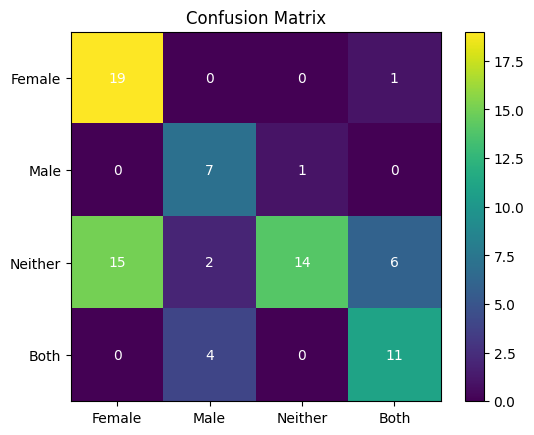

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


Great_Expectations:

    Female_precision: 0.9

    Male_precision: 0.8518518518518519

    Overall acc: 0.6296296296296297
          


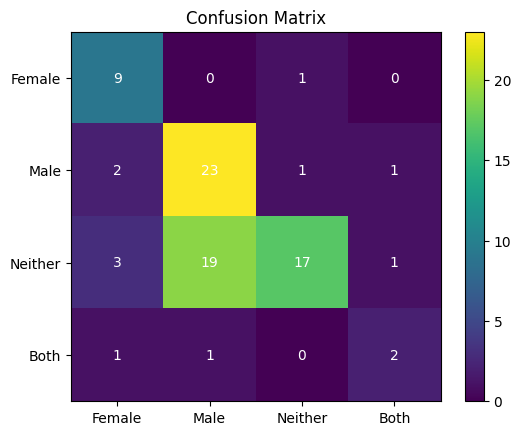

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


Mrs_Dalloway_in_Bond_Street:

    Female_precision: 1.0

    Male_precision: 1.0

    Overall acc: 0.875
          


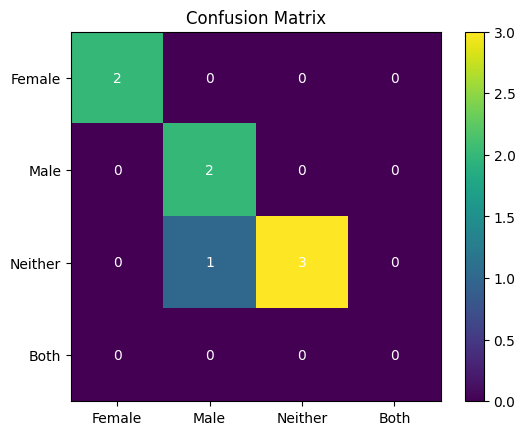

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


Little_Women:

    Female_precision: 0.9375

    Male_precision: 0.9411764705882353

    Overall acc: 0.5922330097087378
          


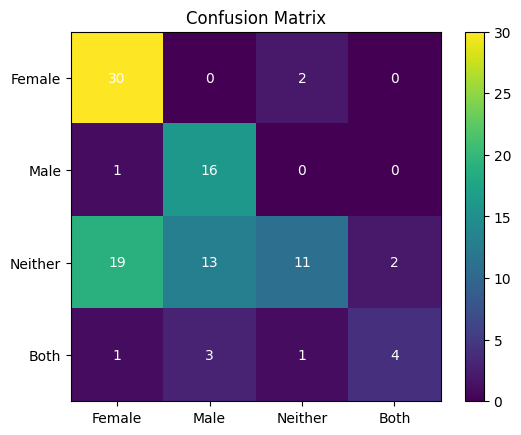

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


Jane_Eyre:

    Female_precision: 0.967741935483871

    Male_precision: 0.7333333333333333

    Overall acc: 0.6666666666666666
          


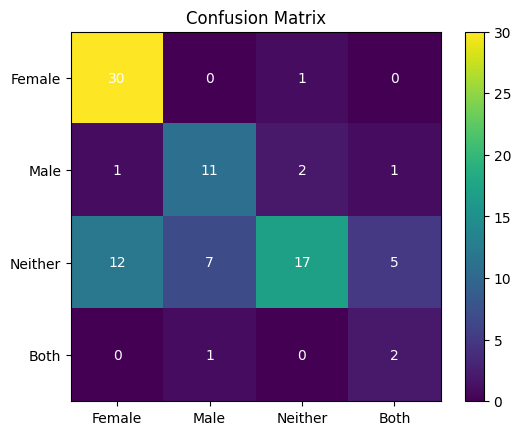

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


Lolita:

    Female_precision: 1.0

    Male_precision: 0.9166666666666666

    Overall acc: 0.7419354838709677
          


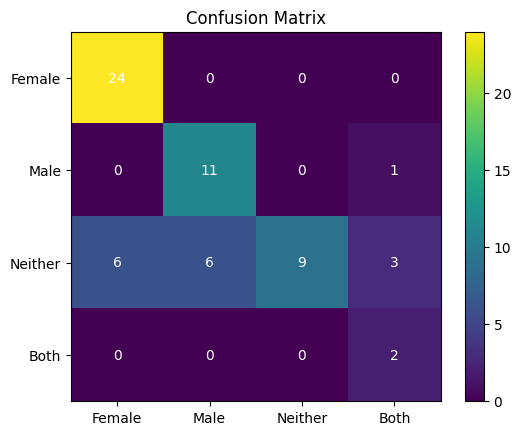

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


Villette:

    Female_precision: 0.84

    Male_precision: 0.8823529411764706

    Overall acc: 0.6428571428571429
          


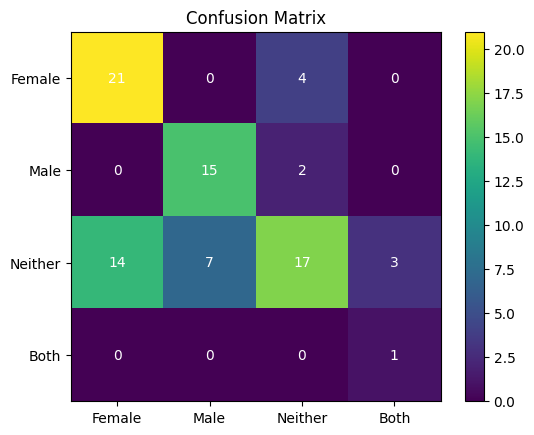

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


Pride_and_Prejudice:

    Female_precision: 1.0

    Male_precision: 0.6666666666666666

    Overall acc: 0.6756756756756757
          


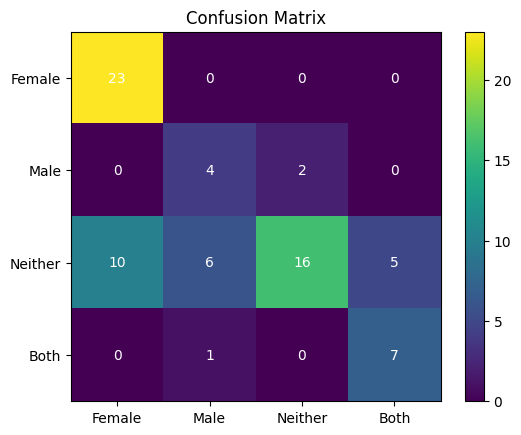

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


The_Great_Gatsby:

    Female_precision: 0.8888888888888888

    Male_precision: 0.9411764705882353

    Overall acc: 0.7837837837837838
          


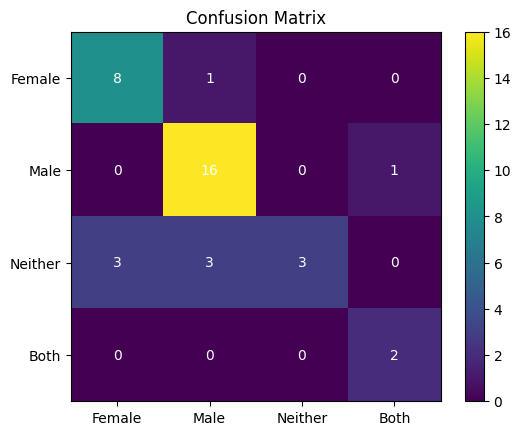

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


The_Three_Musketeers:

    Female_precision: 0.875

    Male_precision: 0.8775510204081632

    Overall acc: 0.7777777777777778
          


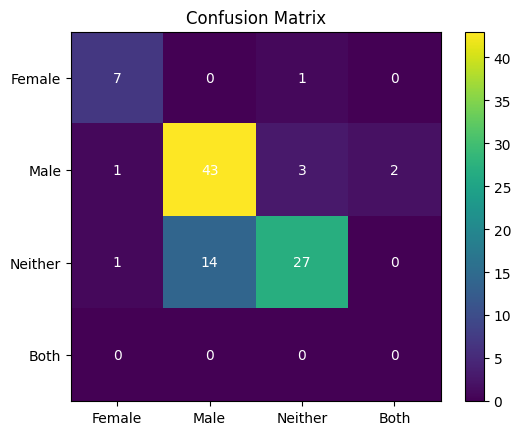

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------




In [ ]:
CM = np.zeros([4,4])
ACC = []
for novel_name in manual_res.keys():
    cm, acc = test_gender_acc(pro, novel_name, manual_res)
    CM += cm
    ACC.append(acc)

Acc average: 0.7023059169970381
Acc std: 0.08416624657580508
----------
Female precision average: 0.9402173913043478
Male precision average: 0.8705882352941177


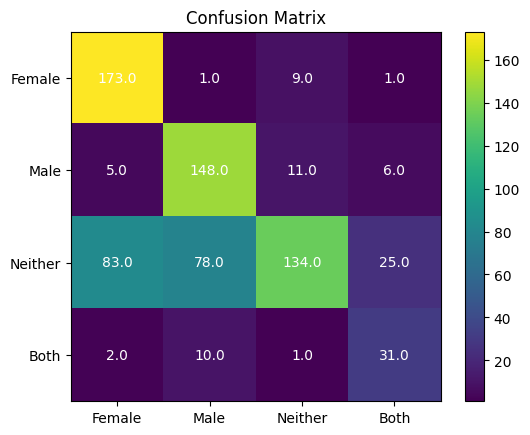

In [ ]:
print(f'Acc average: {np.mean(ACC)}')
print(f'Acc std: {np.std(ACC)}')
print("-"*10)
print(f'Female precision average: {CM[0,0]/np.sum(CM[0])}')
print(f'Male precision average: {CM[1,1]/np.sum(CM[1])}')
confusion_plot(CM)